# Clustering Analisis with mixed cat / num variables

### Tasks
- [x] PCA + Clustering analysis.
- [x] Dimensionality reduction for mixed variables.
- [ ] kmeans --> OPTIC algorithm.

### References
- [[docs] prince 0.7.1 - Project description](https://pypi.org/project/prince/#principal-component-analysis-pca)
- [[TowardsDataScience] - 5 Must-Know Dimensionality Reduction Techniques via Prince](https://towardsdatascience.com/5-must-know-dimensionality-reduction-techniques-via-prince-e6ffb27e55d1)
- [[TowardsDataScience] - "Are You Still Using the Elbow Method?"](https://towardsdatascience.com/are-you-still-using-the-elbow-method-5d271b3063bd) --> [Notebook in Github](https://github.com/smazzanti/are_you_still_using_elbow_method/blob/main/are-you-still-using-elbow-method.ipynb)

In [1]:
%%capture
!pip install prince

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from src.clustering import analysis_clustering

## Clustering Analysis: Only Numerical Variables

### dataset: Iris datast

In [3]:
# load data
X, y = datasets.load_iris(return_X_y=True)
X = pd.DataFrame(data=X, columns=['Sepal length', 'Sepal width', 'Petal length', 'Petal width'])
y = pd.Series(y).map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})
X.shape, y.shape

((150, 4), (150,))

### analysis pca + clustering



-- DIMENSIONALITY REDUCTION ANALYSIS --

Optimal number of PCs for 95.0% cut-off threshold = 2
Number of components selected = 2
How much each PC explains part of the underlying of the distribution: [0.72962445 0.22850762] / Total = 0.9581320720000164 / Unexplained inertia = 0.04186792799998362


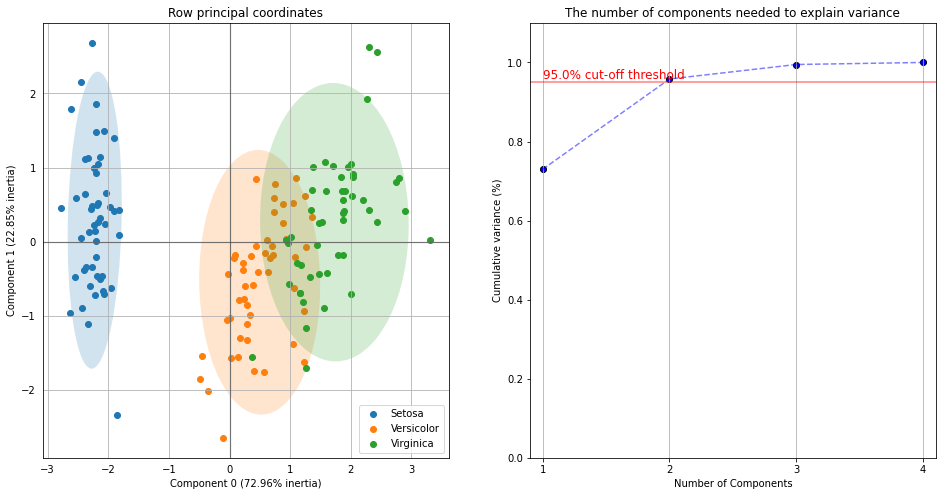

MOST CORRELACTED VARIABLES PER COMPONENT:
{0: {'Petal length': 0.9915551834193606, 'Petal width': 0.9649789606692493, 'Sepal length': 0.8901687648612948}}
{1: {'Sepal width': 0.8827162691623834}}
Final list of variables most correlected with components: ['Sepal width', 'Petal width', 'Petal length', 'Sepal length']


-- CLUSTERING ANALYSIS --

Possible number of clusters to be selected = [ 3  5  9 16 19 22]
Selected optimal number of clusters = 3


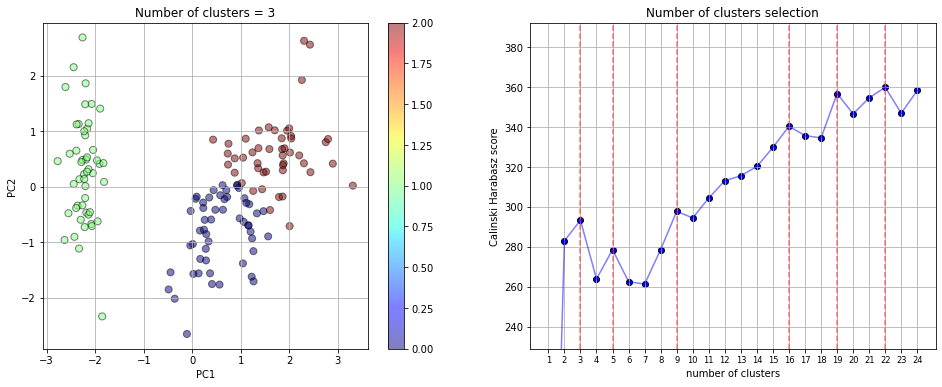

In [4]:
y_cluster = analysis_clustering(X,y)

In [5]:
X["cluster"] = y_cluster
X["species"] = y
X.groupby(["species", "cluster"])[["Sepal length"]].count()

Sepal length
species    cluster              
Setosa     1                  50
Versicolor 0                  39
           2                  11
Virginica  0                  14
           2                  36

## Clustering Analysis: Mixed Numerical and Categorical Variables

### dataset: Titanic

In [6]:
import seaborn as sns
data = sns.load_dataset('titanic')
data.drop(["alive", "deck", "parch", "sibsp","class"], axis = 1, inplace = True)
data['age'] = data['age'].fillna((data['age'].mean()))
data['embarked'] = data['embarked'].fillna(data.embarked.value_counts().index.tolist()[0])
data['embark_town'] = data['embark_town'].fillna(data.embark_town.value_counts().index.tolist()[0])
data["pclass"] = data["pclass"].astype(str)
data.adult_male = data.adult_male.astype("str")
data.alone = data.alone.astype("str")
y = data["survived"].values
X = data.drop("survived", axis = 1)

### analysis pca + clustering

It is a mixed num / cat variables dataset.


-- DIMENSIONALITY REDUCTION ANALYSIS --

Optimal number of PCs for 95.0% cut-off threshold = 8
Number of components selected = 8
How much each PC explains part of the underlying of the distribution: [0.26215426 0.24103082 0.14235014 0.11494127 0.08443392 0.05026159
 0.04741608 0.02880947] / Total = 0.9713975548709375 / Unexplained inertia = 0.028602445129062515


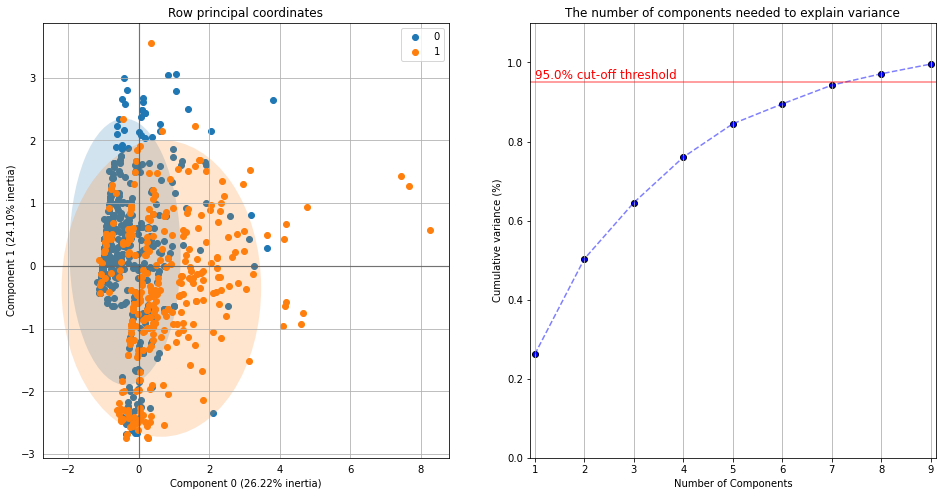

MOST CORRELACTED VARIABLES PER COMPONENT:
{0: {'fare': 0.9985127909644769, 'pclass_1': 0.6054918938245363}}
{1: {'age': 0.9671722582557932, 'who_child': -0.5426352202209556}}
{2: {'fare': 0.9629711287849784}}
{3: {'fare': -0.9822343812762158, 'pclass_1': -0.6309846365294677}}
{4: {'fare': 0.999147834053851, 'pclass_1': 0.5800209668910807}}
{5: {'fare': 0.883329845309726}}
{6: {'fare': 0.8794934572833132}}
{7: {'fare': 0.9855670985233508, 'pclass_1': 0.5372311794628646}}
Final list of variables most correlected with components: ['fare', 'pclass_1', 'who_child', 'age']


-- CLUSTERING ANALYSIS --

Possible number of clusters to be selected = [ 2  7 12 16 23]
Selected optimal number of clusters = 2


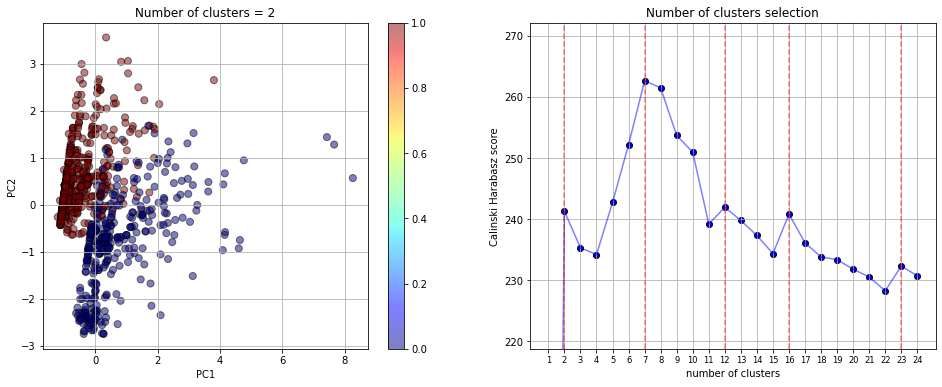

In [7]:
y_cluster = analysis_clustering(X,y)

In [8]:
data["cluster"] = y_cluster
data.groupby(["survived", "cluster"])[["embarked"]].count()

embarked
survived cluster          
0        0             106
         1             443
1        0             256
         1              86